In [1]:
import numpy as np
import matplotlib.pylab as plt
import uproot
import awkward as ak
import seaborn
import RA_funcs as rf
from scipy.signal import find_peaks

imports work


<span style="font-family: arial; font-size:25px; color:pink">

Open ROOT file and extract data

In [2]:

hit_data_1101 = rf.get_ROOT_data_zip("TB_FIRE_1101_hits.root")

hit_data_1096 = rf.get_ROOT_data_zip("TB_FIRE_1096_hits.root")

TB_FIRE_1101_hits.root finished
TB_FIRE_1096_hits.root finished


<span style="font-family: arial; font-size:25px; color:pink">

Hit Counts and Amp in Single Planes

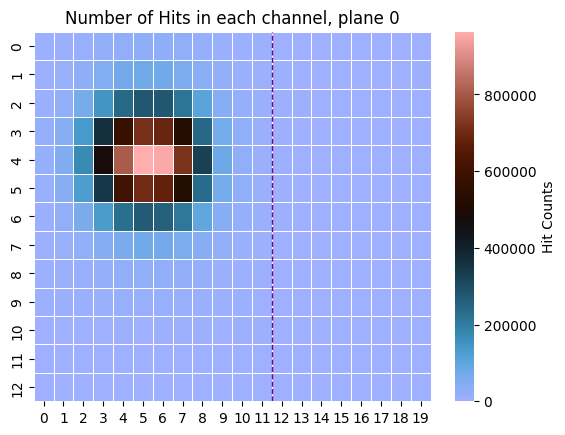

In [3]:
rf.hits_amount_colormap_single_plane(hit_data_1101, 0)

In [4]:
# rf.hits_amount_colormap_single_plane(hit_data_1101, 7)

In [5]:
# rf.average_amp_colormap_single_plane(hit_data_1101, 7, cmap="managua")

<span style="font-family: arial; font-size:25px; color:pink">

Shower Evolution Throughout the Sensor

In [6]:
# rf.single_event_evolution_amp(hit_data_1101, 51, cmap="managua")

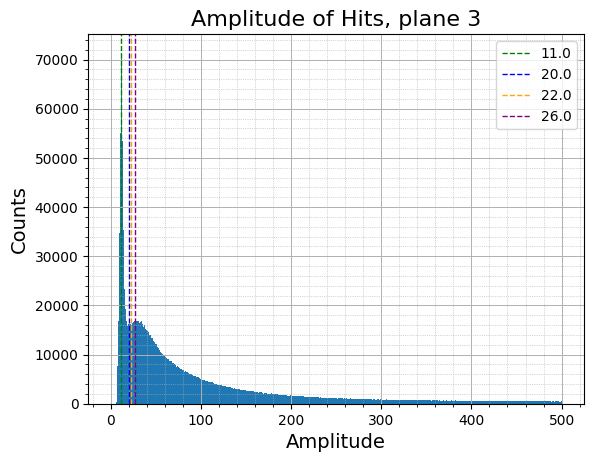

In [12]:
# plt.clf()   # Clear the current figure
# plt.close() # Close any open figures
# %matplotlib widget
rf.amp_histo_single_plane(hit_data_1101,3)

amount of hits in plane 0: 2154539
amount of hits in plane 1: 2267642
amount of hits in plane 2: 2299936
amount of hits in plane 3: 2305207
amount of hits in plane 4: 287522
amount of hits in plane 5: 2339654
amount of hits in plane 6: 2333522
amount of hits in plane 7: 2347161


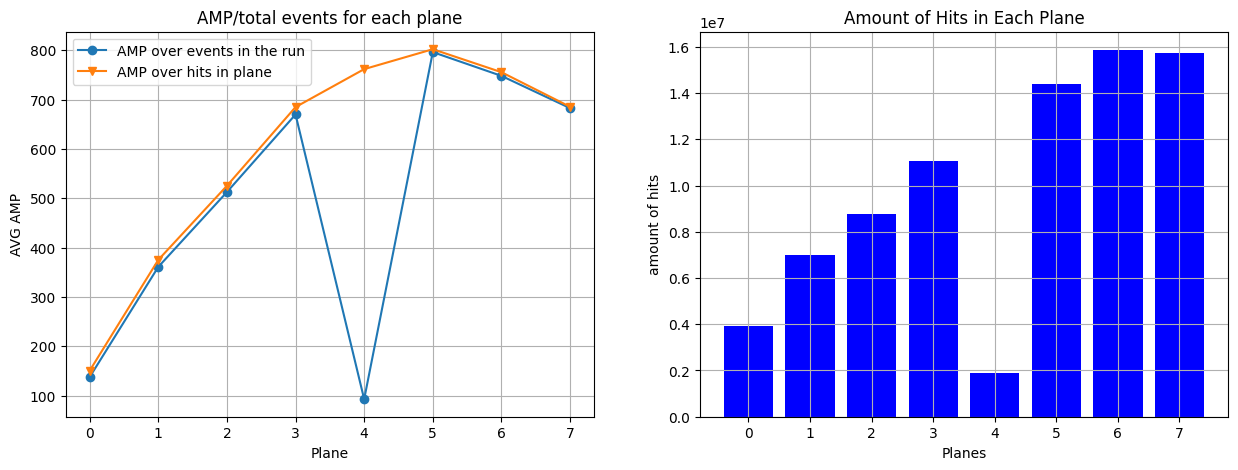

In [8]:
rf.average_amp_vs_plane(hit_data_1101)


amount of hits in plane 0: 442551
amount of hits in plane 1: 472210
amount of hits in plane 2: 481975
amount of hits in plane 3: 487737
amount of hits in plane 4: 493124
amount of hits in plane 5: 495561
amount of hits in plane 6: 495413
amount of hits in plane 7: 497180


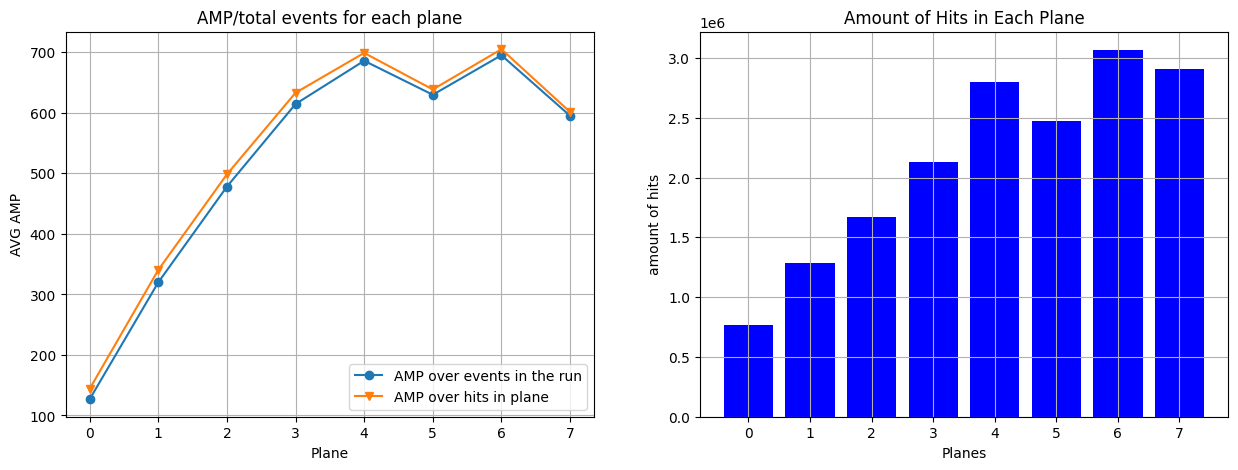

In [9]:
rf.average_amp_vs_plane(hit_data_1096)

In [10]:
# rf.single_event_evolution_amp(hit_data_1096, 9189, cmap = "managua")

In [ ]:
# find the amount of events with NO readings on the given first planes
def empty_first_planes(hit_data, first_planes):
    
    # clean the data from fully empty events
    current_data = hit_data[ak.num(hit_data) > 0]

    for plane in range(first_planes):
        plane = 7 - plane

        # get only events without the currrent plane
        filtered_events = current_data[ak.all(current_data.plane != plane, axis=1)]
        current_plane = filtered_events

    # find the amount of events without hits on the wanted planes
    following_plane = current_plane[current_plane.plane == 7 - first_planes]
    amount = len(following_plane[ak.num(following_plane) > 0])
    return amount


In [117]:
empty_first_planes(hit_data_1096,0)

UnboundLocalError: cannot access local variable 'current_plane' where it is not associated with a value

In [ ]:
# plot the percentage of events with no reads on all numbers of first planes
def plot_empty_first_planes(hit_data):

    empty_planes_list = np.arange(0,9,1)
    
    hits_7 = hit_data[hit_data.plane == 7]
    len_hits_7 = len(hits_7[ak.num(hits_7) > 0])

    amount_of_events_list = [len_hits_7]
    percentage_of_events_list = [(len_hits_7 / len(hit_data)) * 100]

    # get the amount of events for each number of empty layers
    for empty_planes in range(1,9):
        amount_of_events = empty_first_planes(hit_data, empty_planes)
        amount_of_events_list.append(amount_of_events)

        # get the percentage of events with the empty planes from the total events
        percent_of_events = (amount_of_events / len(hit_data)) * 100
        percentage_of_events_list.append(percent_of_events)
    


    # plot the data
    # plt.plot(empty_planes_list, amount_of_events_list, marker='o')
    plt.plot(empty_planes_list, percentage_of_events_list, marker='o')
    print(ak.sum(percentage_of_events_list))
    # plt.scatter(0, (len_hits_7 / len(hit_data)) * 100)
    plt.xlabel('First Empty Planes')
    plt.ylabel('Percentage of Events (%)')
    plt.title('The percent of events where only the first stated planes read no hits')
    plt.grid(True)
    plt.legend()
    



    



In [135]:
# len(hit_data_1096[ak.num(hit_data_1096[hit_data_1096.plane == 7]) == 0])
len(hit_data_1096[ak.num(hit_data_1096[hit_data_1096.plane == 7]) > 0]) / len(hit_data_1096) *100

88.07668654880678

In [140]:
len(hit_data_1096[ak.all(hit_data_1096.plane == 7, axis=1)])
hit_data_1096[ak.all(hit_data_1096.plane == 7, axis=1)]


<Array [[{plane: 7, ch: 158, ...}], ...] type='39 * var * {plane: int32, ch...'>

111.13419748000344


C:\Users\bents\AppData\Local\Temp\ipykernel_14100\3196293185.py:32: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


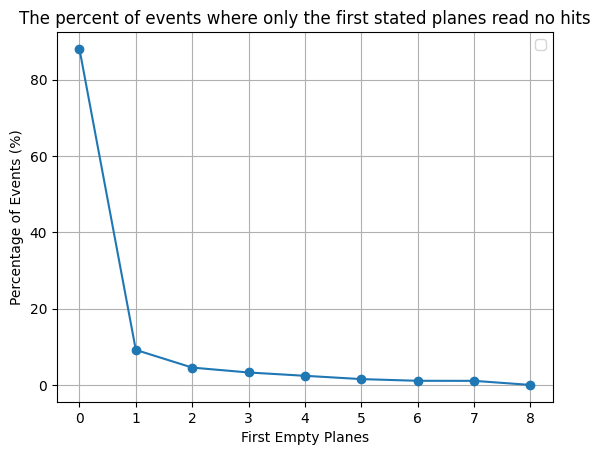

In [128]:
plot_empty_first_planes(hit_data_1096)

In [76]:
# ...existing code...
# This keeps only events where NO entry has plane == 7
filtered_events = hit_data_1096[ak.all(hit_data_1096.plane != 7, axis=1)]
# ...existing code...
a = filtered_events[filtered_events.plane == 6]
len(a[ak.num(a) > 0])
# len(filtered_events)

46130

In [111]:

hit_data_1096[hit_data_1096.plane == 7]


<Array [[{plane: 7, ch: 180, ...}], ..., []] type='502461 * var * {plane: i...'>